In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import math

f:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. 准备数据

## 1.1 加载训练集和测试集数据

In [2]:
print("Loading data...")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print(train.shape)
print(test.shape)

Loading data...
(159571, 8)
(153164, 2)


In [3]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


## 1.2 缺失值分析

In [6]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

## 1.3 文本处理

In [7]:
from keras.preprocessing.text import text_to_word_sequence

f:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


text_to_word_sequence 这个模块可以将文本转换成小写，并且自动用空格对文本进行分割<br>
它并不会移除反斜杠，所以我们需要将反斜杠添加到过滤器里<br>
下面将训练集中的所有标点符号去除，用空格作为分隔符提取单词，并且全部转换为小写<br>

In [8]:
train['comment_text_words'] = train.comment_text.apply(text_to_word_sequence, 
                                                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'')

In [9]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d, aww, he, matches, this, background, colour..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, i, m, really, not, trying, to, edit..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[more, i, can, t, make, any, real, suggestions..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[you, sir, are, my, hero, any, chance, you, re..."


In [10]:
train.iloc[0, :]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
train.iloc[0, :]['comment_text_words']

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 'they',
 'weren',
 't',
 'vandalisms',
 'just',
 'closure',
 'on',
 'some',
 'gas',
 'after',
 'i',
 'voted',
 'at',
 'new',
 'york',
 'dolls',
 'fac',
 'and',
 'please',
 'don',
 't',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'i',
 'm',
 'retired',
 'now',
 '89',
 '205',
 '38',
 '27']

对测试集数据做相同的转换

In [12]:
test['comment_text_words'] = test.comment_text.apply(text_to_word_sequence, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'')

In [13]:
test.head()

,id,comment_text,comment_text_words
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,"[yo, bitch, ja, rule, is, more, succesful, the..."
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,"[from, rfc, the, title, is, fine, as, it, is, ..."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...","[sources, zawe, ashton, on, lapland, —]"
3,00017563c3f7919a,":If you have a look back at the source, the in...","[if, you, have, a, look, back, at, the, source..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,"[i, don, t, anonymously, edit, articles, at, all]"


## 1.4 使用预训练好的 word embeddings

In [14]:
# 将预训练好的 embeddings 进行处理，返回几个有用的变量：
# words_to_index：将单词和编号进行映射
# index_to_words：将编号和单词进行映射，与 words_to_index 相反
# word_to_vec_map：将单词与它的 embedding 进行映射
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        # 将单词保存到一个集合当中
        words = set()
        # 将单词与 embedding 的映射保存到一个字典中
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            # 列表的第一个元素是单词
            curr_word = line[0]
            # 将单词加入到集合中
            words.add(curr_word)
            # 列表的其余元素是 embedding，将单词与 embedding 进行映射，然后保存到字典中
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        # 将单词进行编号，编号从 1 开始
        # 因为填充的时候使用 0 填充
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            # 创建映射，key 是单词，value 是编号
            words_to_index[w] = i
            # 创建映射，key 是编号，value 是单词
            index_to_words[i] = w
            # 编号递增
            i = i + 1
            
    # 将生成的 3 个映射返回
    return words_to_index, index_to_words, word_to_vec_map

In [15]:
# glove.6B.50d.txt 是网上已经预训练好的 word embedding 文件
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('./glove.6B.50d.txt')

## 1.5 将单词转换为编号

In [16]:
def sentences_to_indices(X):
    X_indices = []
    for word in X:
        try:
            X_indices.append(word_to_index[word])
        except:
            pass
    
    return X_indices

In [17]:
train['comment_text_indexes'] = train.comment_text_words.apply(sentences_to_indices)

In [18]:
test['comment_text_indexes'] = test.comment_text_words.apply(sentences_to_indices)

In [19]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_words,comment_text_indexes
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, why, the, edits, made, under, my...","[142859, 386984, 357266, 133606, 229835, 37115..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d, aww, he, matches, this, background, colour...","[114975, 64411, 175199, 236441, 358160, 65760,..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, i, m, really, not, trying, to, edit...","[177989, 232536, 185457, 228656, 302352, 26455..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[more, i, can, t, make, any, real, suggestions...","[249714, 185457, 90548, 350784, 231458, 57170,..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[you, sir, are, my, hero, any, chance, you, re...","[394475, 332819, 58997, 254258, 177433, 57170,..."


In [20]:
test.head()

,id,comment_text,comment_text_words,comment_text_indexes
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,"[yo, bitch, ja, rule, is, more, succesful, the...","[394017, 77181, 194532, 313189, 192973, 249714..."
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,"[from, rfc, the, title, is, fine, as, it, is, ...","[154323, 307569, 357266, 360602, 192973, 14844..."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...","[sources, zawe, ashton, on, lapland, —]","[338236, 61140, 269798, 217323, 399908]"
3,00017563c3f7919a,":If you have a look back at the source, the in...","[if, you, have, a, look, back, at, the, source...","[186645, 394475, 174642, 43010, 225629, 65680,..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,"[i, don, t, anonymously, edit, articles, at, all]","[185457, 127406, 350784, 56015, 133575, 60373,..."


## 1.6 文本长度分析

In [21]:
# 现获取训练集的文本最长的长度，然后获取测试集的文本的最长的长度，然后取其最大值
comment_text_max_words_length = np.max([np.max(train.comment_text_words.apply(lambda x: len(x)))
                                   , np.max(test.comment_text_words.apply(lambda x: len(x)))])
print("最大文本长度是 "+str(comment_text_max_words_length))

最大文本长度是 2142


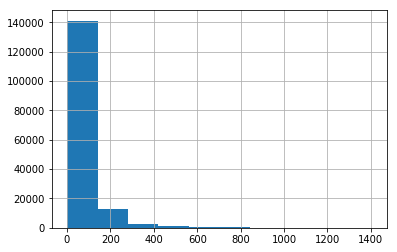

In [22]:
# 查看文本的长度的分布
train.comment_text_words.apply(lambda x: len(x)).hist()

In [23]:
# 从图中可以发现，文本长度集中在0-400之间，所以我们把最大文本长度设置为200
MAX_COMMENT_TEXT_SEQ = 200

## 1.8 padding

In [24]:
# pad_sequences 函数用于将数字列表进行填充
# 如果列表长度大于最大长度，那么将列表进行裁剪，如果列表长度小于最大长度，那么将列表补充到最大长度，并且默认填充0

from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {'comment_text': pad_sequences(dataset.comment_text_indexes, maxlen=MAX_COMMENT_TEXT_SEQ)}
    return X

# 将训练集数据的文本编号列表进行填充，并且提取出来
X_train = get_keras_data(train)
# 将测试集数据的文本编号列表进行填充，并且提取出来
X_test = get_keras_data(test)

## 1.9 将处理好的数据保存起来

In [25]:
import pickle

In [26]:
datafile = open('data.pkl', 'wb')

pickle.dump(X_train, datafile)
pickle.dump(X_test, datafile)
pickle.dump(word_to_index, datafile)
pickle.dump(index_to_word, datafile)
pickle.dump(word_to_vec_map, datafile)

datafile.close()

## 1.10 AUC 定义

materials：http://blog.csdn.net/xwd18280820053/article/details/78740379